# Parsing Locobot Dataset using cocoapi
* Install [pycocoapi](https://github.com/cocodataset/cocoapi)
* Download [locobot images dataset](https://www.dropbox.com/sh/f5jcs8pbuax9jgc/AAATpjE3MpiKZe1T7zML9iima?dl=0) and assign its path to the variable `images_folder`.
* Download [annotations file](https://www.dropbox.com/s/020boxvshpowngi/ny_coco_annotations.json?dl=0) and assign its path to the variable `annoation_file`.
* Run the notebook.

In [33]:
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import os
import random
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

annotation_file = '/checkpoint/dhirajgandhi/active_vision/habitat_data/turk_annotation/habitat_train.json'
images_folder = '/checkpoint/dhirajgandhi/active_vision/habitat_data/turk_rgb/'

# Load COCO annotations
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [34]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
window door chair counter cabinet wall cupboard painting stove carpet shower picture frame sofa condition floor wallframe dishwasher microwave oven cooking range table man roof couch refrigerator conditioning unit portrait kitchen cabinets doorknob wardrobe washing machine curtain paite picturw frame drawer conditoner scrubbler exhaust hood bookshelf showcase cabinetd condtioner drawers do kitched hood baseboard heater doormate bass vase desk ceiling lighting lamp post washing machined tile paint paintign fridge shelf artwork air conditioner



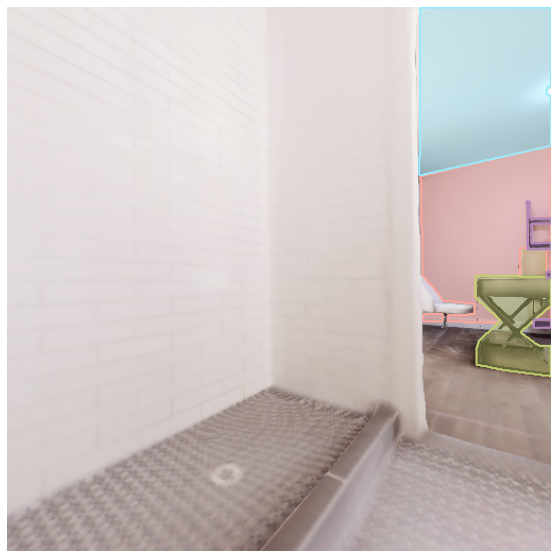

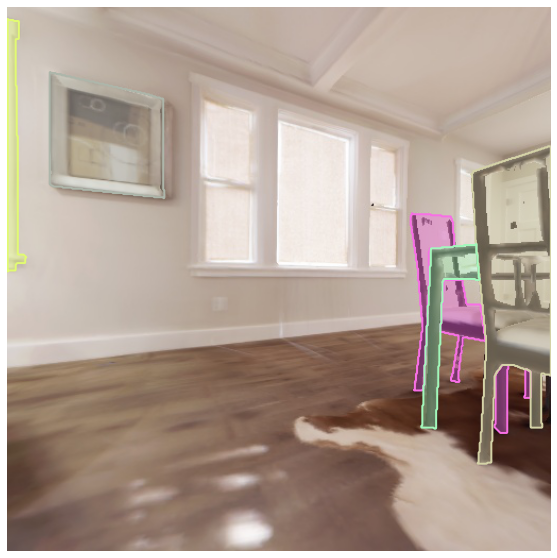

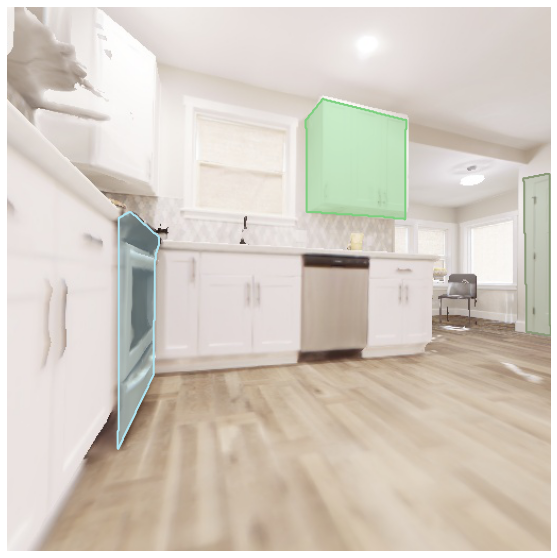

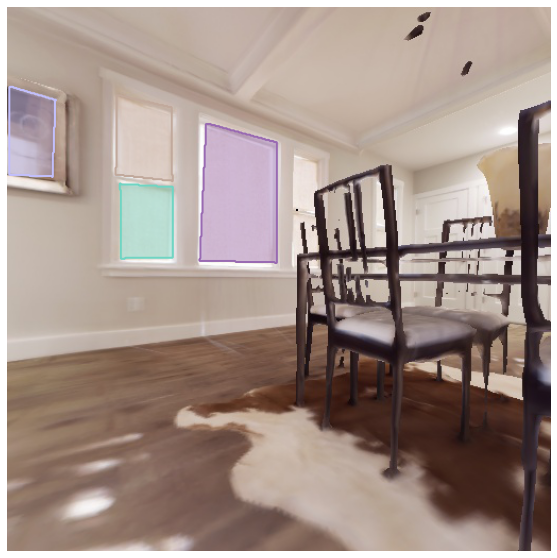

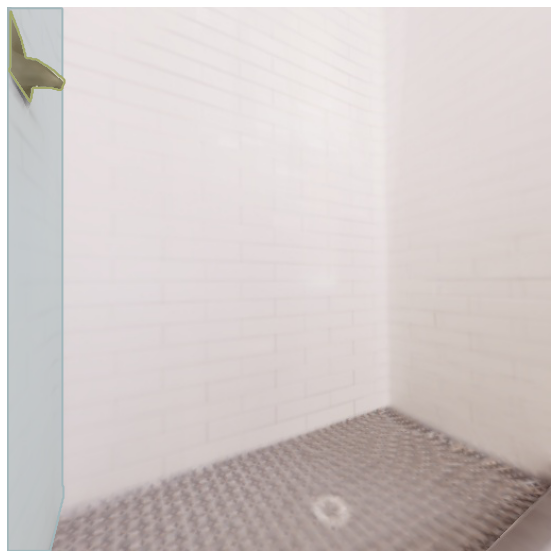

In [35]:
# Display 5 random files with all annotations 
imgIds = coco.getImgIds()
imgs = coco.loadImgs(random.choices(imgIds, k=5))

for x in imgs:
    I = io.imread(os.path.join(images_folder, x['file_name']))
    plt.axis('off')
    plt.imshow(I)
    annIds = coco.getAnnIds(imgIds=[x['id']])
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()

In [37]:
imgs

[{'file_name': '04920.jpg', 'height': 512, 'id': 4920, 'width': 512},
 {'file_name': '00780.jpg', 'height': 512, 'id': 780, 'width': 512},
 {'file_name': '02640.jpg', 'height': 512, 'id': 2640, 'width': 512},
 {'file_name': '00240.jpg', 'height': 512, 'id': 240, 'width': 512},
 {'file_name': '05220.jpg', 'height': 512, 'id': 5220, 'width': 512}]

In [38]:
annIds = coco.getAnnIds(imgIds=780)

[{'area': 10771.0,
  'bbox': [40.0, 61.0, 108.0, 119.0],
  'category_id': 8,
  'id': 51,
  'image_id': 780,
  'iscrowd': 0,
  'segmentation': [[147.0,
    179.5,
    146.5,
    179.0,
    146.0,
    178.5,
    145.0,
    178.5,
    144.0,
    178.5,
    143.0,
    178.5,
    142.0,
    178.5,
    141.0,
    178.5,
    140.0,
    178.5,
    139.0,
    178.5,
    138.0,
    178.5,
    137.5,
    178.0,
    137.0,
    177.5,
    136.0,
    177.5,
    135.0,
    177.5,
    134.0,
    177.5,
    133.0,
    177.5,
    132.0,
    177.5,
    131.0,
    177.5,
    130.0,
    177.5,
    129.0,
    177.5,
    128.0,
    177.5,
    127.5,
    177.0,
    127.0,
    176.5,
    126.0,
    176.5,
    125.0,
    176.5,
    124.0,
    176.5,
    123.0,
    176.5,
    122.0,
    176.5,
    121.0,
    176.5,
    120.0,
    176.5,
    119.0,
    176.5,
    118.5,
    176.0,
    118.0,
    175.5,
    117.0,
    175.5,
    116.0,
    175.5,
    115.0,
    175.5,
    114.0,
    175.5,
    113.0,
    175.5,
  

In [67]:
coco.getCatIds(annIds[0])

[]

In [68]:
coco

In [45]:
mask = coco.annToMask(anns[0])

In [46]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [70]:
mask.min()

0

In [71]:
mask.max()

1

In [51]:
len(coco.getImgIds())

71

In [52]:
imgIds

[960,
 5460,
 2760,
 60,
 4020,
 5160,
 2520,
 4560,
 600,
 1200,
 1560,
 480,
 2340,
 3480,
 5340,
 5220,
 360,
 4080,
 3180,
 2160,
 720,
 4440,
 2580,
 3840,
 4140,
 4680,
 2640,
 3420,
 2100,
 5640,
 240,
 3060,
 2040,
 840,
 5040,
 1380,
 2400,
 3360,
 3660,
 900,
 2460,
 3720,
 1980,
 2280,
 3540,
 3900,
 4980,
 1500,
 4920,
 780,
 4800,
 4740,
 2940,
 3960,
 180,
 3300,
 300,
 1140,
 5580,
 2820,
 1740,
 3780,
 420,
 1860,
 5400,
 660,
 5520,
 5280,
 540,
 5100,
 4860]

In [55]:
x = coco.loadImgs(960)

In [56]:
annIds = coco.getAnnIds(imgIds=[x['id']])

TypeError: list indices must be integers or slices, not str

In [57]:
x

[{'file_name': '00960.jpg', 'height': 512, 'id': 960, 'width': 512}]

In [58]:
x['id']

TypeError: list indices must be integers or slices, not str

In [59]:
x[0]['id']

960

In [60]:
annIds = coco.getAnnIds(imgIds=x[0]['id'])

In [61]:
annIds

[61]